### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

In [1]:
# Write your code here
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data_a = np.random.normal(20, 4, 15)
data_b = np.random.normal(20, 4, 15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [2]:
np.mean(data_a), np.mean(data_b)

(19.684623827882117, 19.125273364257357)

Based on the observed difference between the means, I do not believe there is a statistically significant difference between samples a and b.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

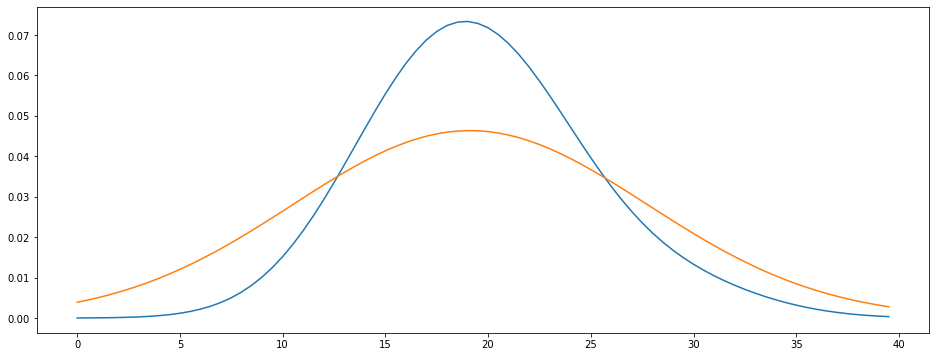

In [3]:
# Write your code here
kde_a = stats.gaussian_kde(data_a, bw_method=1)
kde_b = stats.gaussian_kde(data_b, bw_method=2)

plt.figure(figsize=(16,6))
x_values = np.arange(0, 40, 0.5)
x_densities_a = kde_a.evaluate(x_values)
x_densities_b = kde_b.evaluate(x_values)
plt.plot(x_values, x_densities_a)
plt.plot(x_values, x_densities_b)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

# Write your code here

Visually, dataset a does not differ significantly from dataset b

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [4]:
# Write your code here
data_ab = np.concatenate([data_a,data_b])
mean_difference = []

for _ in range(1000):
    np.random.shuffle(data_ab)
    a_subset = data_ab[:20]
    b_subset = data_ab[20:]
    mean_difference.append(np.mean(a_subset) - np.mean(b_subset))

sum(mean_difference >= (np.mean(data_a) - np.mean(data_b))) / len(mean_difference)

0.372

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

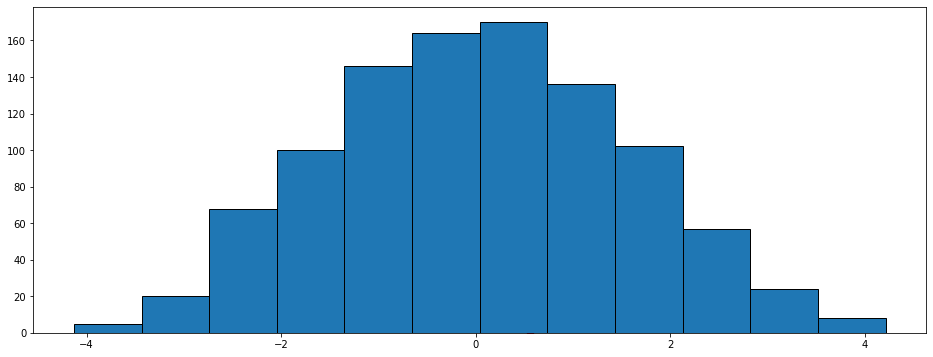

In [5]:
# Write your code here
plt.figure(figsize=(16,6))
_ = plt.hist(mean_difference, edgecolor='black', bins=12)
plt.scatter(np.mean(data_a) - np.mean(data_b), 0, color = "red", s=40)